# Colates, cleans and analyses canopy temperature data from Rain shelter barley trail

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ETFunctions as et
%matplotlib inline

HourSec = 3600

In [2]:
Data = pd.read_pickle('.\DataFrames\TempAndMet.pkl')

## Calculate Potential Evapotranspiration

### Produce hourly metDataFrame


In [3]:
HourlyMetData = pd.DataFrame(index = Data.ix['2014-11-08':,:].resample('h').mean().index)
HourlyMetData.ix[:,'AirTemperature'] = Data.ix['2014-11-08':,'AirTemperature'].resample('h').mean()
HourlyMetData.ix[:,'IncomingRadnMJ'] = Data.ix['2014-11-08':,'IncomingRadnMJ'].resample('h').sum()
HourlyMetData.ix[:,'Rainfall'] = Data.ix['2014-11-08':,'Rainfall'].resample('h').sum()
HourlyMetData.ix[:,'RelativeHumidity'] = Data.ix['2014-11-08':,'RelativeHumidity'].resample('h').mean()
HourlyMetData.ix[:,'Windspeed'] = Data.ix['2014-11-08':,'Windspeed'].resample('h').mean()
HourlyMetData.ix[:,'NetRadiation'] = Data.ix['2014-11-08':,'RnMJ'].resample('h').sum()
HourlyMetData.ix[:,'Ra'] = Data.ix['2014-11-08':,'Ra'].resample('h').mean()

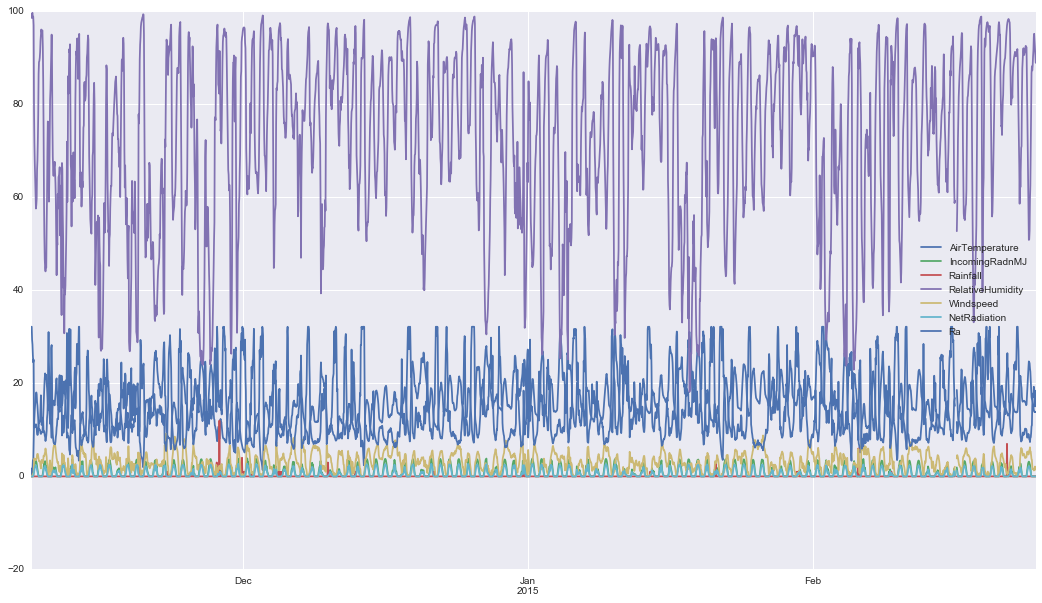

In [4]:
HourlyMetData.plot(figsize=(18,10))

In [5]:
HourlyMetData.ix[:,'NightTimePET'] =[et.PenmanMonteith(HourlyMetData.ix[x,'NetRadiation'],
                              HourlyMetData.ix[x,'AirTemperature'],
                              HourlyMetData.ix[x,'RelativeHumidity'],
                              HourlyMetData.ix[x,'Windspeed'],
                              HourlyMetData.ix[x, 'Ra'],
                              200,HourSec) for x in range(HourlyMetData.index.size)]

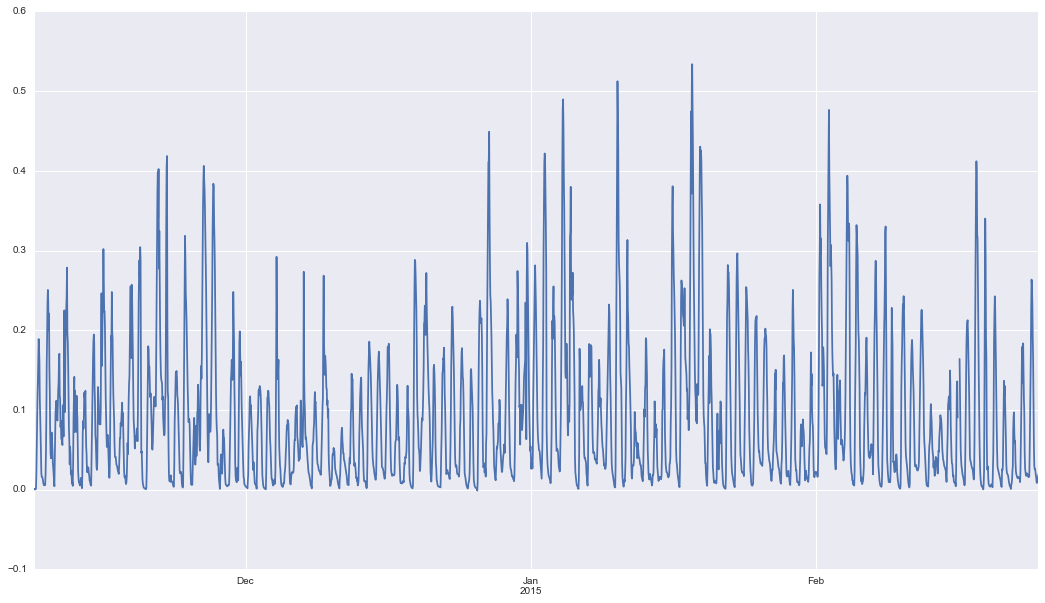

In [6]:
HourlyMetData.ix[:,'NightTimePET'].plot(figsize=(18,10))

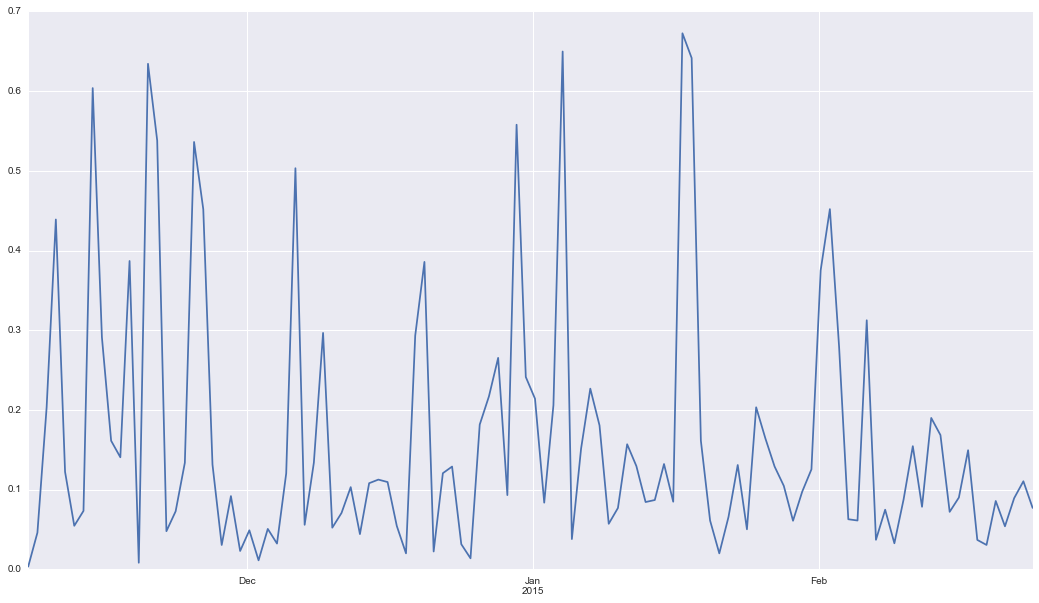

In [7]:
NightTimePET = HourlyMetData.ix[HourlyMetData.index.indexer_between_time(datetime.time(23),
                    datetime.time(4)),'NightTimePET'].resample('24h',base=5).sum()
NightTimePET.plot(figsize=(18,10))

In [8]:
NightTimePET.to_pickle('.\DataFrames\NightTimePET.pkl')

In [9]:
HourlyMetData.ix[:,'DayLightPET'] =[et.PenmanMonteith(HourlyMetData.ix[x,'NetRadiation'],
                              HourlyMetData.ix[x,'AirTemperature'],
                              HourlyMetData.ix[x,'RelativeHumidity'],
                              HourlyMetData.ix[x,'Windspeed'],
                              HourlyMetData.ix[x, 'Ra'],
                              70,HourSec) for x in range(HourlyMetData.index.size)]

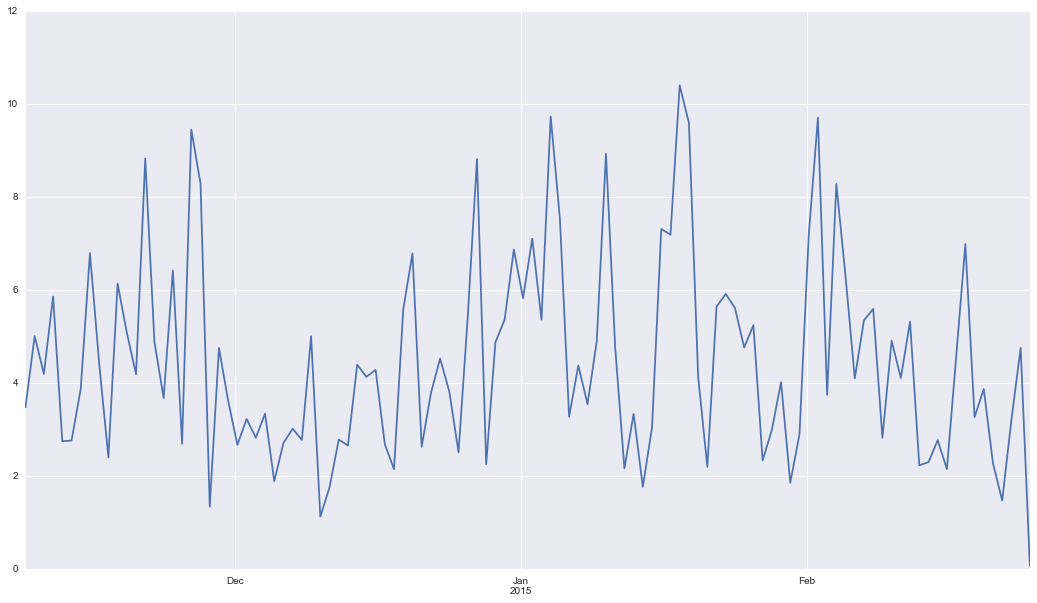

In [10]:
DayTimePET = HourlyMetData.ix[HourlyMetData.index.indexer_between_time(datetime.time(5),
                    datetime.time(22)),'DayLightPET'].resample('24h',base=5).sum()
DayTimePET.plot(figsize=(18,10))

In [11]:
DayTimePET.to_pickle('.\DataFrames\DayTimePET.pkl')